In [1]:
hidefigs = False
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
run run_residuals -vx -i FE_H -u -0.4 -d -0.5 -s red_clump -c False 


Initialization runtime 3.21 s
Number of stars 846

Maximum SNR before correction 200.00
SNR correction runtime 0.12 s
Maximum SNR before correction 200.00

Nonzero Minimum SNR before mask 50.0001
SNR cut runtime 0.00 s
Minimum SNR after mask 50.0001

Bitmask application runtime 0.00 s

Pixel residuals runtime 1.85 s
Maximum residual 0.217873524319 

Finding random sigma runtime 1.72 s



In [6]:
from residuals import readElementWindow,elems
elemwindows,window_all,window_peak,windowPeaks,windowPixels,tophats = readElementWindow('windowinfo.pkl')

badpix,  []
       iter        R2             rchi2
EMPCA  1/25       0.02876265      0.00014707
EMPCA  2/25       0.14132955      0.00011856
EMPCA  3/25       0.20768712      0.00010693
EMPCA  4/25       0.23878286      0.00010186
EMPCA  5/25       0.25221733      0.00009982
EMPCA  6/25       0.25880925      0.00009887
EMPCA  7/25       0.26237684      0.00009837
EMPCA  8/25       0.26472093      0.00009806
EMPCA  9/25       0.26623421      0.00009783
R2: 0.368337177413
       iter        R2             rchi2
EMPCA  1/25       0.03191603      2.71721691
EMPCA  2/25       0.15734778      2.11941590
EMPCA  3/25       0.23667571      1.84136495
EMPCA  4/25       0.26641394      1.75269548
EMPCA  5/25       0.27855494      1.72100167
EMPCA  6/25       0.28515606      1.70406795
EMPCA  7/25       0.28901851      1.69400992
EMPCA  8/25       0.29129796      1.68773792
EMPCA  9/25       0.29310499      1.68335206
R2: 0.350716694506
Pixel runtime (unweighted):	1.67481238445  min
Pixel runtime

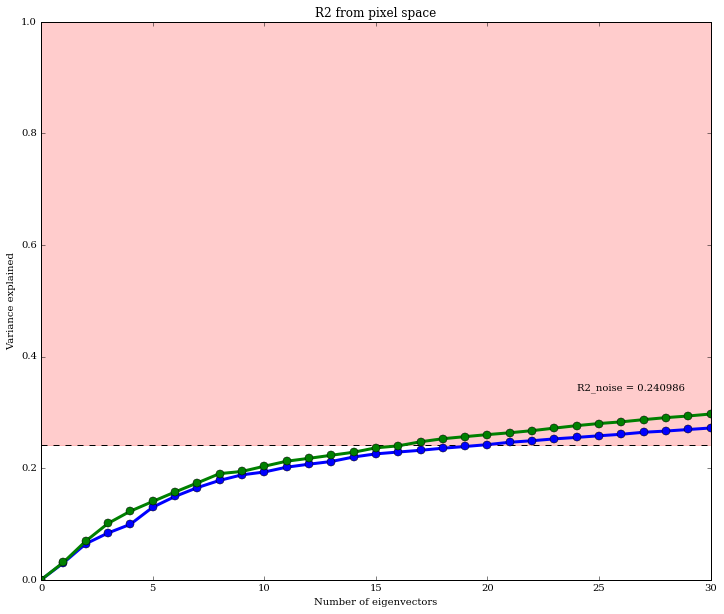

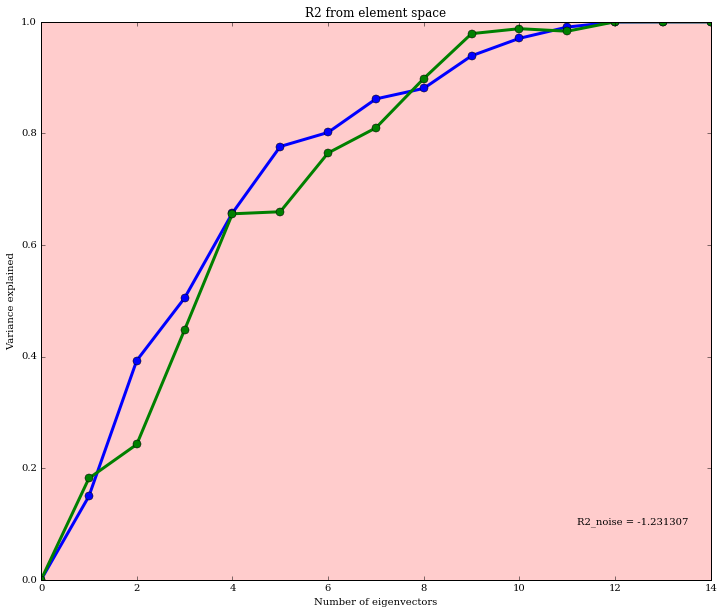

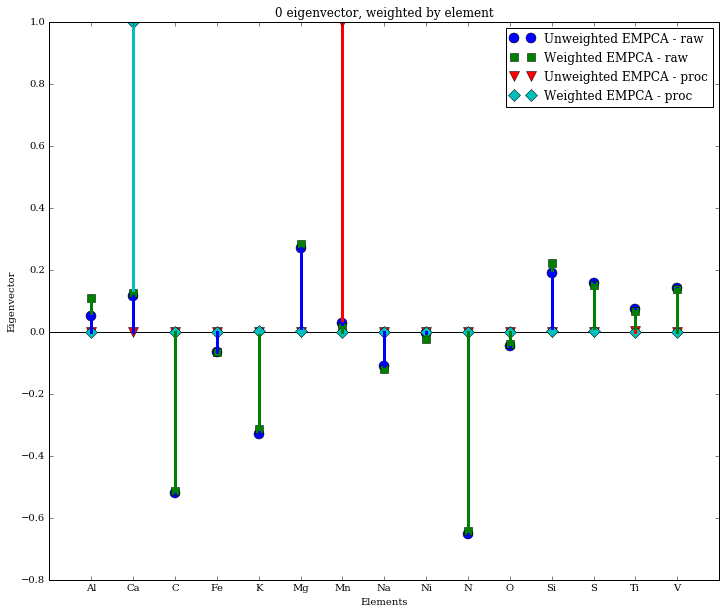

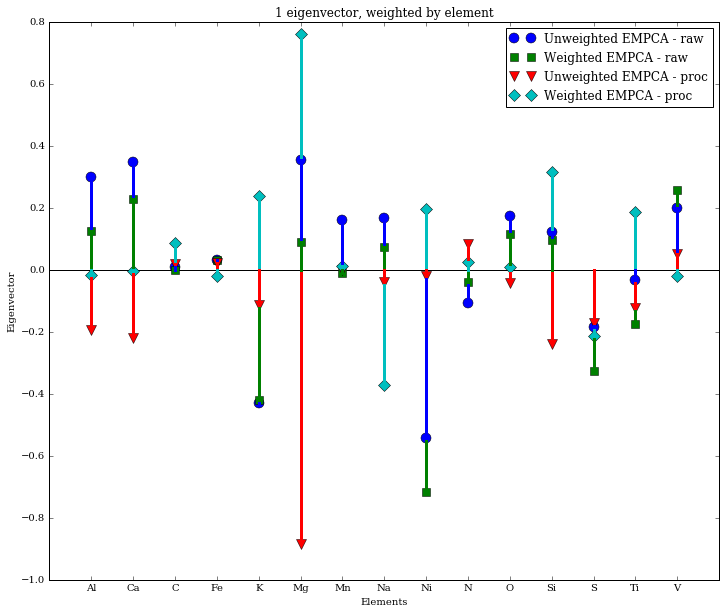

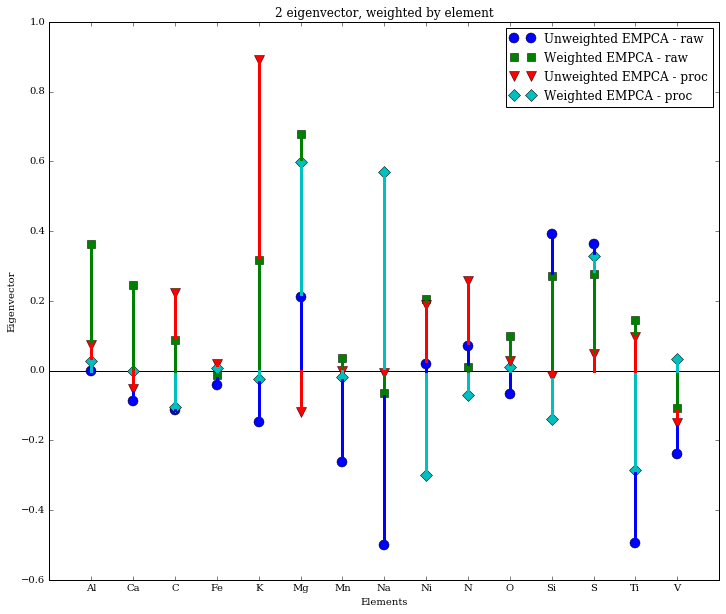

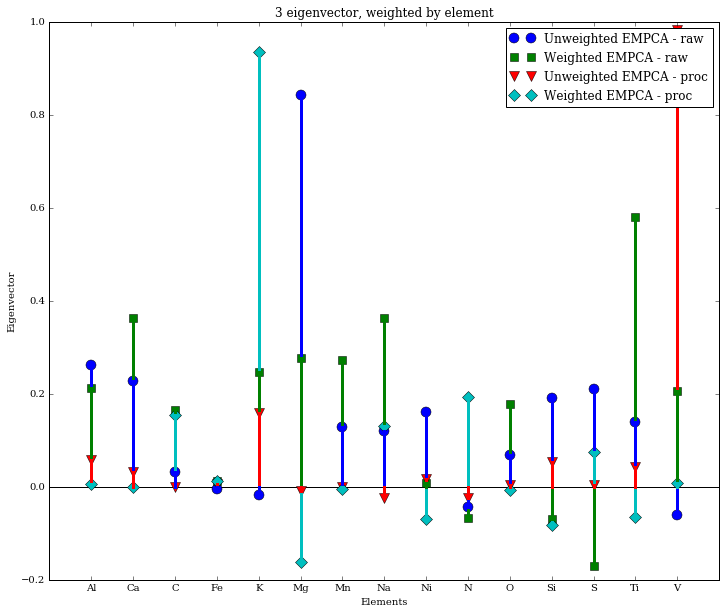

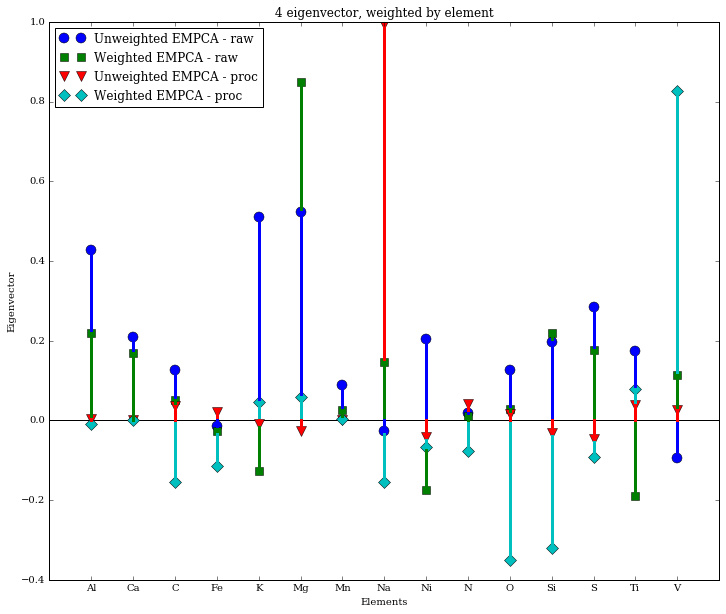

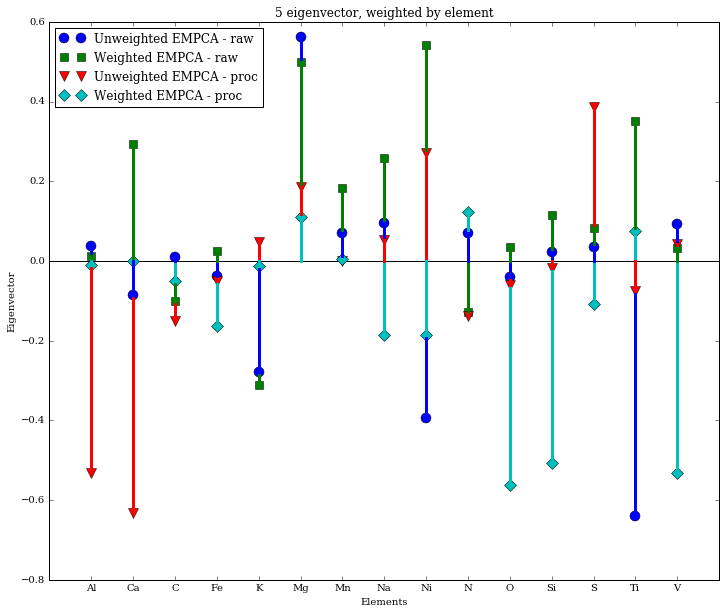

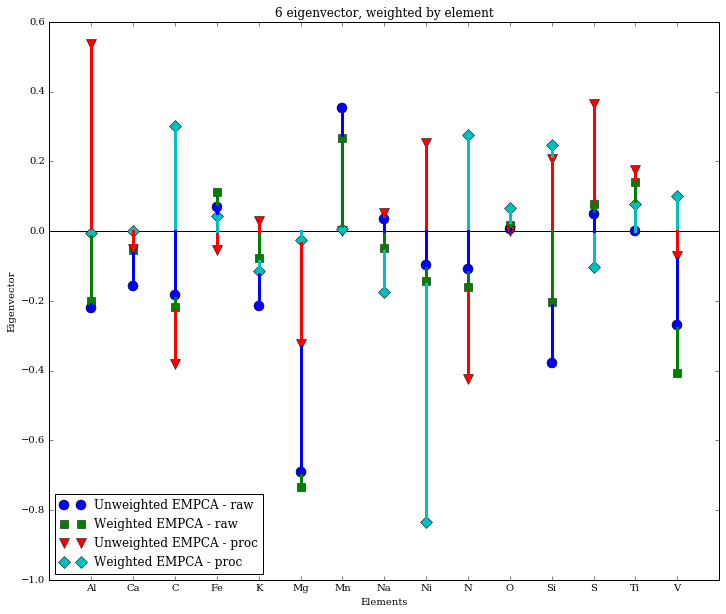

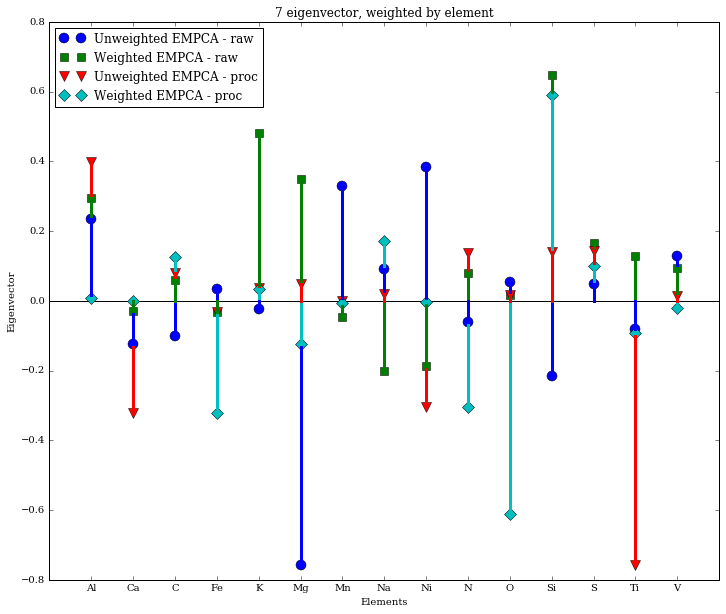

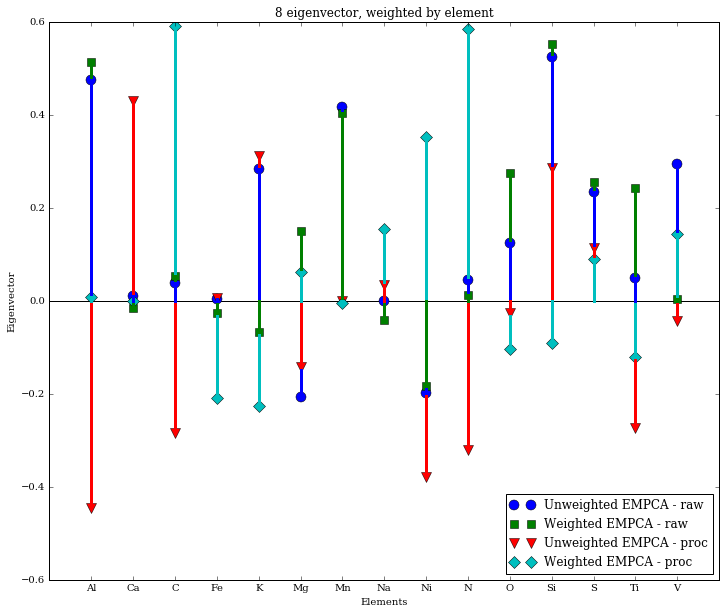

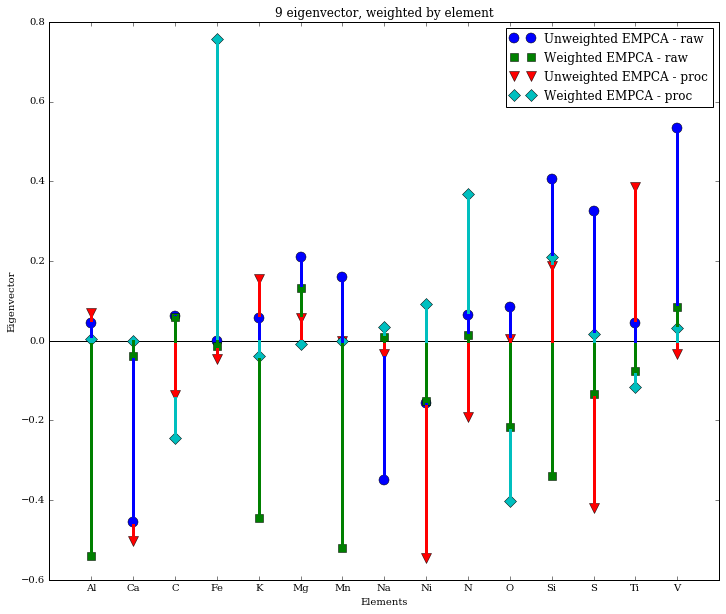

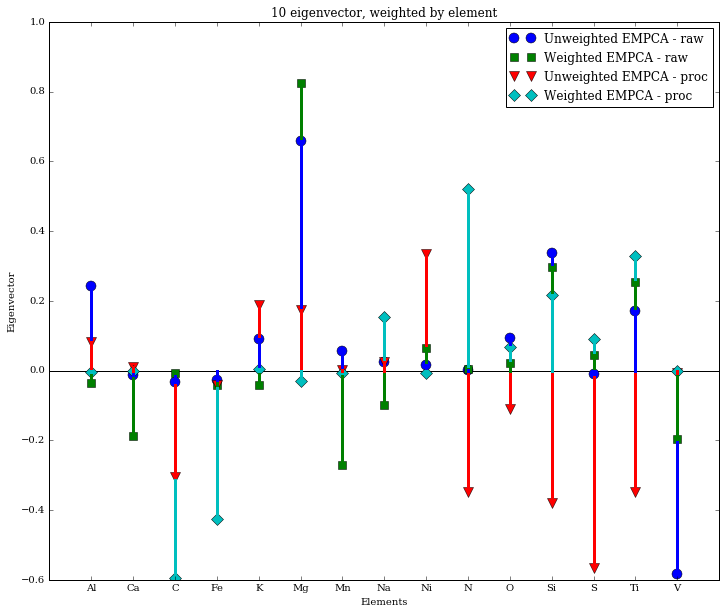

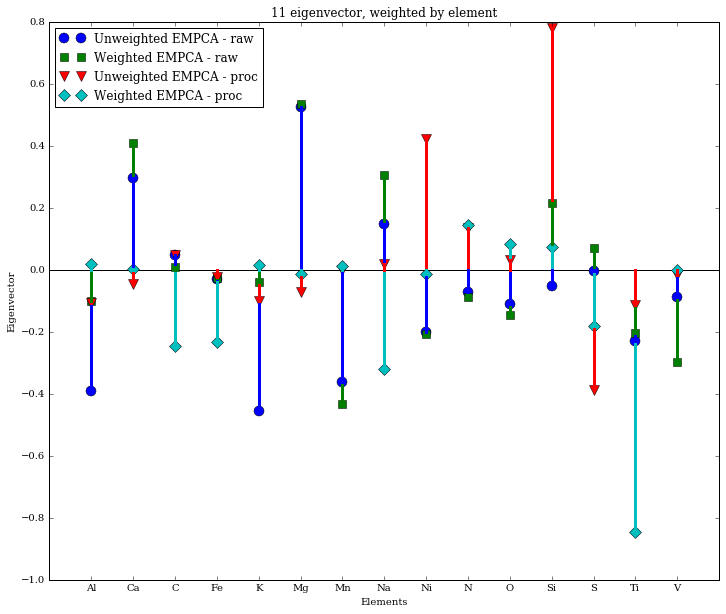

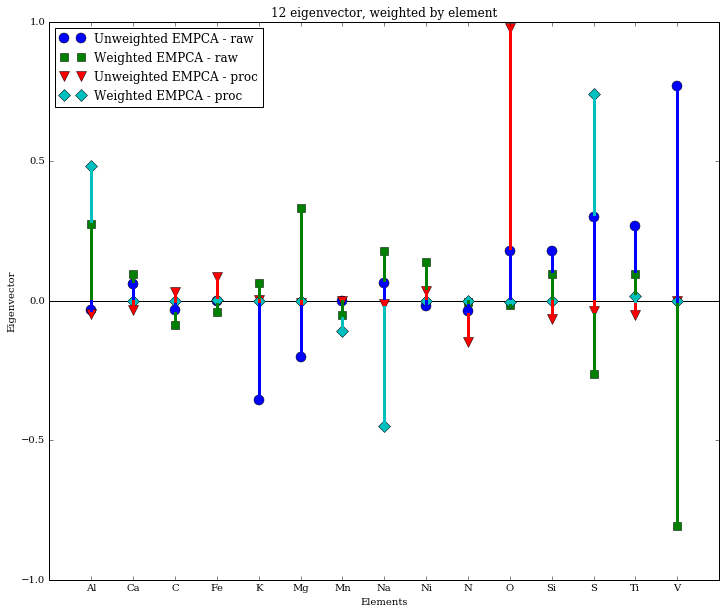

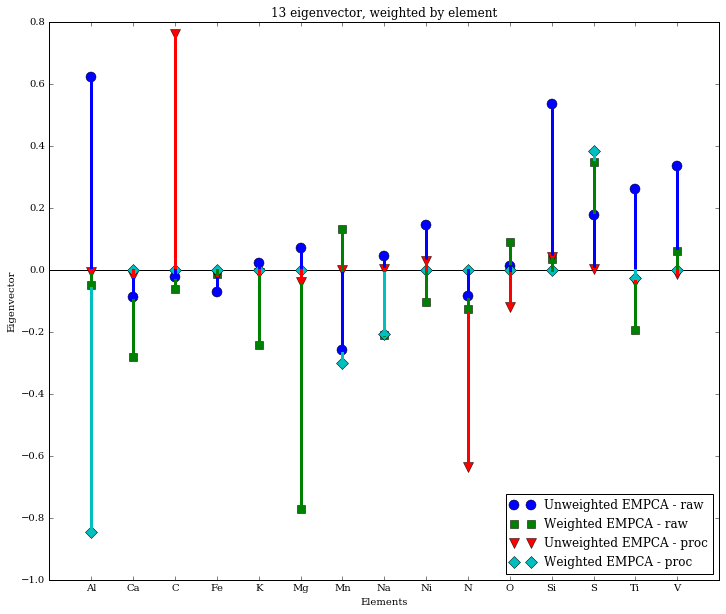

In [7]:
run run_empca -vug -m red_clump/pickles/model_FE_H_u-0.4_d-0.5.pkl -d 2e-3 -n 30

In [10]:
np.where(residual.mask==True), np.where(errs.mask==True)

((array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1,  1,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,
          6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
          6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
          6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
          7, 12, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
         14, 14]),
  array([ 38, 154, 155, 486, 527, 567, 574, 586, 616, 635, 689, 701, 704,
         707, 715, 720,   4,  13,  21,  29,  35,  38,  48,  

In [ ]:
for elem in elems:
    w = elemwindows[elem]
    elemregions = np.tile(w,(model.numstars,1))
    shapeinds = np.where(elemregions != 0)
    elemregions[model.mask!=0] = np.nan
    hidewindow = np.unique(np.where(elemregions==0)[1])
    window = [i for i in range(aspcappix) if i not in hidewindow]
    elemregions = elemregions.T[window].T
    plt.figure(figsize=(10,8))
    plt.imshow(elemregions,aspect = float(elemregions.shape[1])/model.numstars,interpolation='nearest')
    plt.title('Masked window for {0}'.format(elem))
    splitval = len(window)/10
    plt.xticks(range(elemregions.shape[1])[::splitval],window[::splitval])
    plt.colorbar()
    plt.savefig('temp{0}.png'.format(elem))

In [ ]:
np.where(model.errs==0),np.where(model.errs.mask==True)

In [ ]:
maSNR = np.ma.mean(starsample.specs/starsample.errs,axis=1)
# Plot SNR histogram

SNRhist,SNRbins = np.histogram(starsample.data['SNR'],bins = 50)
maSNRhist,maSNRbins = np.histogram(maSNR,bins=5)
plt.figure(figsize=(16,14))
plt.bar(SNRbins[:-1],SNRhist,width = (SNRbins[1]-SNRbins[0]),label='APOGEE SNR')
plt.bar(maSNRbins[:-1],maSNRhist,width = (maSNRbins[1]-maSNRbins[0]),color='green',alpha=0.5,label='SNR after masking')
plt.xlabel('SNR')
plt.ylabel('Number of stars')
plt.legend(loc = 'best')

In [ ]:
import empca
reload(empca)
from empca import empca

In [ ]:
mask.shape

In [ ]:
# Do EMPCA
nvecs = 30
deltR2 = 2e-3
gen = True
empcaname = starsample.outName('pkl',content = 'empca',order = starsample.order,seed = starsample.seed,cross=starsample.cross)
empcaname = empcaname.split('pkl')[0]+'nvec{0}'.format(nvecs)+'.pkl'
if os.path.isfile(empcaname) and not gen:
    empcamodel,empcamodel_weight = acs.pklread(empcaname)
elif not os.path.isfile(empcaname) or gen:
    mask = (starsample.residual.T.mask==False)
    weights = mask.astype(int)
    weights[mask] = 1./np.sqrt(starsample.errs[mask]**2) # Correct?
    empcamodel,runtime1 = timeIt(empca,starsample.residual.T,weights = mask.astype(int),nvec=nvecs,deltR2=deltR2)
    print 'Runtime:', runtime1/60.,' min'
    empcamodel_weight,runtime2 = timeIt(empca,starsample.residual.T,weights = weights,nvec=nvecs,deltR2=deltR2)
    print 'Runtime:', runtime2/60.,' min'
    acs.pklwrite(empcaname,[empcamodel,empcamodel_weight])

In [ ]:
Vnoise = (1./(starsample.numstars*aspcappix))*np.ma.sum(np.ma.sum(starsample.errs**2,axis=1))
R2noise = 1-Vnoise/(empcamodel._unmasked_data_mad2*1.4826**2.)
R2 = np.zeros(nvecs)
R2_w = np.zeros(nvecs)
for vec in range(nvecs):
    R2[vec] = empcamodel.R2(vec)
    R2_w[vec] = empcamodel_weight.R2(vec)

In [ ]:
hidefigs=False
plt.figure(1)
plt.plot(range(nvecs),R2,label='Unweighted EMPCA')
plt.plot(range(nvecs),R2_w,label='Weighted EMPCA')
plt.axhline(R2noise,color='red',label='Noise Threshold')
plt.xlabel('Number of eigenvectors')
plt.ylabel('Variance')
plt.legend(loc='best')
plt.xlim(0,nvecs-1)
#plt.savefig('./{0}/empca/empcaR2_order{1}_seed{2}_cross{3}_{4}_u{5}_d{6}_nvec{7}.png'.format(starsample.type, starsample.order,starsample.seed,starsample.cross,label,up,low,nvecs))
if hidefigs:
    plt.close()

In [ ]:
neweigvecs = np.zeros((nvecs,len(elems)))
neweigvecs_w = np.zeros((nvecs,len(elems)))
for ind in range(len(elems)):
    for vec in range(nvecs):
        neweigvecs[vec][ind] = starsample.weighting(empcamodel.eigvec[vec],elems[ind])
        neweigvecs_w[vec][ind] = starsample.weighting(empcamodel_weight.eigvec[vec],elems[ind])

In [ ]:
# Create weighted residuals
weighted = np.ma.masked_array(np.zeros((len(elems),len(starsample.specs))))
weightedsigs = np.ma.masked_array(np.zeros((len(elems),len(starsample.specs))))
i=0
for elem in elems:
    weightedr = starsample.weighting_stars(starsample.residual,elem,
                                           starsample.outName('pkl','resids',elem=elem,
                                                              order = starsample.order,cross=starsample.cross))
    weighteds = starsample.weighting_stars(starsample.sigma.T,elem,
                                           starsample.outName('pkl','sigma',elem=elem,
                                                              order = starsample.order,seed = starsample.seed))
    doubleResidualHistPlot(elem,weightedr,weighteds,
                           starsample.outName('res','residhist',elem = elem,order = starsample.order,
                                              cross=starsample.cross,seed = starsample.seed),
                           bins = 50)
    weighted[i] = weightedr
    weightedsigs[i] = weighteds
    i+=1

In [ ]:
# Do EMPCA on weighted residuals
nvecs = 5
deltR2 = 2e-5
empcaname = starsample.outName('pkl',content = 'empca_element',order = starsample.order,
                               seed = starsample.seed,cross=starsample.cross)
empcaname = empcaname.split('.pkl')[0]+'nvec{0}'.format(nvecs)+'.pkl'
if os.path.isfile(empcaname):
    wempcamodel,wempcamodel_weight = acs.pklread(empcaname)
elif not os.path.isfile(empcaname):
    mask = (weighted.T.mask==False)
    weights = 1./np.sqrt(weightedsigs.T**2) # Correct?
    wempcamodel,runtime1 = timeIt(empca,weighted.T,weights = mask.astype(int),nvec=nvecs,deltR2=deltR2)
    print 'Runtime:', runtime1/60.,' min'
    wempcamodel_weight,runtime2 = timeIt(empca,weighted.T,weights = weights,nvec=nvecs,deltR2=deltR2)
    print 'Runtime:', runtime2/60.,' min'
    acs.pklwrite(empcaname,[wempcamodel,wempcamodel_weight])

In [ ]:
for vec in range(5):
    plt.figure(figsize=(16,14))
    plt.xticks(range(len(elems)),elems)
    plt.plot(neweigvecs[vec],label='Unweighted EMPCA - raw')
    plt.plot(neweigvecs_w[vec],label='Weighted EMPCA - raw')
    plt.plot(wempcamodel.eigvec[vec], label= 'Unweighted EMPCA - proc')
    plt.plot(wempcamodel_weight.eigvec[vec], label= 'Weighted EMPCA - proc')
    plt.legend(loc='best')
    plt.xlabel('Elements')
    plt.ylabel('Eigenvector')
    plt.title('{0} eigenvector, weighted by element'.format(vec))
    plt.savefig('./{0}/empca/eig{1}_order{2}_seed{3}_cross{4}_{5}_u{6}_d{7}_nvec{8}.png'.format(starsample.type,vec, starsample.order,starsample.seed,starsample.cross,label,up,low,nvecs))
    if hidefigs:
        plt.close()

In [ ]:
plt.figure()
allmasksplot = np.copy(starsample.mask.astype(np.float64))
allmasksplot[np.where(starsample.mask==0)] = np.nan
plt.imshow(allmasksplot,aspect = 7214./starsample.numstars,interpolation='nearest',cmap = 'viridis')
plt.ylim(0,starsample.numstars)
plt.colorbar()
plt.savefig('./{0}/test2_mask_order{1}_seed{2}_cross{3}_{4}_u{5}_d{6}.png'.format(starsample.type, starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()

plt.figure()
allbitmasksplot = np.copy(starsample.bitmask).astype(np.float64)
allbitmasksplot[np.where(starsample.bitmask==0)] = np.nan
plt.imshow(np.log2(allbitmasksplot),aspect = 7214./starsample.numstars,interpolation='nearest',cmap = 'viridis')
plt.ylim(0,starsample.numstars)
plt.colorbar()
plt.savefig('./{0}/test2_bitmask_order{1}_seed{2}_cross{3}_{4}_u{5}_d{6}.png'.format(starsample.type, starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()

plt.figure()
SNRplot = starsample.specs/starsample.errs
SNRplot[np.where(SNRplot.mask!=0)] = np.nan
plt.imshow(SNRplot,aspect = 7214./starsample.numstars,interpolation='nearest',cmap = 'viridis')
plt.ylim(0,starsample.numstars)
plt.colorbar()
plt.savefig('./{0}/test2_SNR_order{1}_seed{2}_cross{3}_{4}_u{5}_d{6}.png'.format(starsample.type, starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()

In [ ]:
residcov = np.ma.cov(starsample.residual)
normresidcov = np.ma.cov(starsample.residual/starsample.errs.T)

In [ ]:
rcovlim = 1e-4
nrcovlim = 4

In [ ]:
# Plot covariance of raw pixel residuals
plt.figure(figsize=(10,12))
plt.imshow(residcov,interpolation='nearest',cmap = 'Spectral',vmax=rcovlim,vmin=-rcovlim)
plt.colorbar()
plt.savefig('./{0}/covariance/order{1}_seed{2}_cross{3}_{4}_u{5}_d{6}.png'.format(starsample.type, starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()

# Plot covariance of residuals divided by pixel flux uncertainty
plt.figure(figsize=(10,12))
plt.imshow(normresidcov,interpolation='nearest',cmap = 'Spectral',vmax=nrcovlim,vmin=-nrcovlim)
plt.colorbar()
plt.savefig('./{0}/covariance/norm_order{1}_seed{2}_cross{3}_{4}_u{5}_d{6}.png'.format(starsample.type, starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()

# Plot diagonal of covariance of raw pixel residuals
plt.figure(figsize=(16,4))
diag = np.array([residcov[i,i] for i in range(len(residcov))])
plt.plot(diag)
plt.xlim(0,len(diag))
plt.xlabel('Pixel')
plt.ylabel('Variance')
plt.savefig('./{0}/covariance/diag_order{1}_seed{2}_cross{3}_{4}_u{5}_d{6}.png'.format(starsample.type, starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()

# Plot diagonal of  covariance of residuals divided by pixel flux uncertainty
plt.figure(figsize=(16,4))
normdiag = np.array([normresidcov[i,i] for i in range(len(normresidcov))])
plt.plot(normdiag,linewidth = 0.5)
plt.xlim(0,len(normdiag))
plt.ylim(0,10)
plt.xlabel('Pixel')
plt.ylabel('Variance')
plt.savefig('./{0}/covariance/norm_diag_order{1}_seed{2}_cross{3}_{4}_u{5}_d{6}.png'.format(starsample.type, starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()

# Plot two slices of the covariance matrices
samppix = 3700
plt.figure(figsize=(16,8))
plt.plot(residcov[samppix]/np.max(residcov[samppix]),label = 'Raw residual, peak = {0}'.format(np.max(residcov[samppix])))
plt.plot(normresidcov[samppix]/np.max(normresidcov[samppix]),label = 'Sigma normalized residual, peak = {0}'.format(np.max(normresidcov[samppix])))
plt.axvline(samppix,color='red')
plt.ylabel('Covariance at pixel {0} normalized to peak'.format(samppix))
plt.xlabel('Pixel')
plt.xlim(samppix-100,samppix+100)
plt.legend(loc = 'best')
plt.savefig('./{0}/covariance/pix{1}_order{2}_seed{3}_cross{4}_{5}_u{6}_d{7}.png'.format(starsample.type, samppix,starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()

samppix = 6000
plt.figure(figsize=(16,8))
plt.plot(residcov[samppix]/np.max(residcov[samppix]),label = 'Raw residual, peak = {0}'.format(np.max(residcov[samppix])))
plt.plot(normresidcov[samppix]/np.max(normresidcov[samppix]),label = 'Sigma normalized residual, peak = {0}'.format(np.max(normresidcov[samppix])))
plt.axvline(samppix,color='red')
plt.ylabel('Covariance at pixel {0} normalized to peak'.format(samppix))
plt.xlabel('Pixel')
plt.xlim(samppix-100,samppix+100)
plt.legend(loc = 'best')
plt.savefig('./{0}/covariance/pix{1}_order{2}_seed{3}_cross{4}_{5}_u{6}_d{7}.png'.format(starsample.type, samppix,starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()